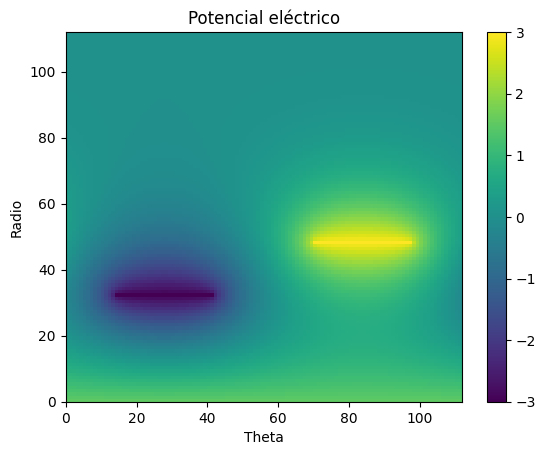

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def electric_potential(n_r, n_theta, v0, vr1, vr2):
    # Discretización del dominio
    r = np.linspace(1, 8, n_r)
    theta = np.linspace(0, 2 * np.pi, n_theta)
    dr = r[1] - r[0]
    dtheta = theta[1] - theta[0]
    
    # Inicialización del potencial
    V = np.zeros((n_r, n_theta))
    
    # Condiciones de frontera
    V[0, :] = v0
    V[np.abs(r - 3) < dr / 2, (theta >= np.pi / 4) & (theta <= 3 * np.pi / 4)] = vr1
    V[np.abs(r - 4) < dr / 2, (theta >= 5 * np.pi / 4) & (theta <= 7 * np.pi / 4)] = vr2
    
    # Solución iterativa
    error = 1e-6
    max_iterations = 1000
    iteration = 0
    while iteration < max_iterations:
        V_old = V.copy()
        
        for i in range(1, n_r - 1):
            for j in range(n_theta):
                j_left = j - 1 if j > 0 else n_theta - 1
                j_right = j + 1 if j < n_theta - 1 else 0
                
                V[i, j] = 1 / (2 * (2 * r[i] + 1)) * (
                    r[i] * (V_old[i + 1, j] + V_old[i - 1, j]) + 
                    (r[i] + 1) * (V_old[i, j_right] + V_old[i, j_left])
                )
        
        # Actualizar condiciones de frontera
        V[0, :] = v0
        V[np.abs(r - 3) < dr / 2, (theta >= np.pi / 4) & (theta <= 3 * np.pi / 4)] = vr1
        V[np.abs(r - 4) < dr / 2, (theta >= 5 * np.pi / 4) & (theta <= 7 * np.pi / 4)] = vr2
        
        # Criterio de convergencia
        if np.linalg.norm(V - V_old) < error:
            break
        
        iteration += 1
    
    return V

# Parámetros del problema
n_r = 112
n_theta = 112
v0 = 1.5
vr1 = -3
vr2 = 3

# Solución del problema
V = electric_potential(n_r, n_theta, v0, vr1, vr2)

# Visualización
plt.pcolor(V, cmap='viridis', shading='auto')
plt.colorbar()
plt.title("Potencial eléctrico")
plt.xlabel("Theta")
plt.ylabel("Radio")
plt.show()


In [26]:
def plot_potential_cartesian(V, r, theta):
    R, Theta = np.meshgrid(r, theta)
    X, Y = R * np.cos(Theta), R * np.sin(Theta)
    
    plt.pcolor(X, Y, V.T, cmap='viridis', shading='auto')
    plt.colorbar()
    plt.title("Potencial eléctrico en coordenadas cartesianas")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis('equal')
    plt.show()

# Parámetros del problema
n_r = 112
n_theta = 112
v0 = 1.5
vr1 = -3
vr2 = 3

# Solución del problema
V = electric_potential(n_r, n_theta, v0, vr1, vr2)

# Discretización del dominio
r = np.linspace(1, 8, n_r)
theta = np.linspace(0, 2 * np.pi, n_theta)




C:\Users\Santiago\AppData\Local\Temp\ipykernel_20176\3296057989.py:8: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(X, Y, V_cartesian, cmap='viridis', shading='auto')


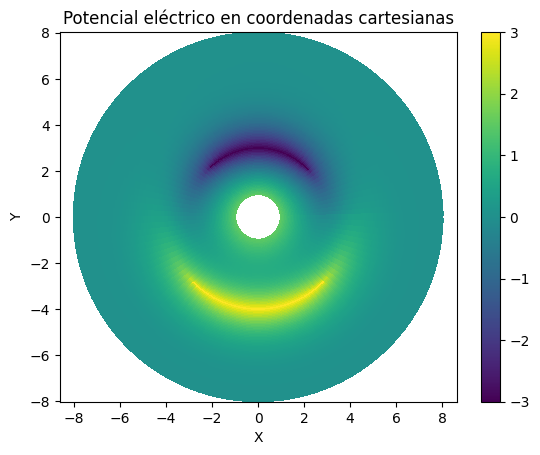

In [27]:
def plot_potential_cartesian(V, r, theta, v0):
    R, Theta = np.meshgrid(r, theta)
    X, Y = R * np.cos(Theta), R * np.sin(Theta)
    
    V_cartesian = V.T.copy()
    V_cartesian[:, r <= 1] = v0
    
    plt.pcolor(X, Y, V_cartesian, cmap='viridis', shading='auto')
    plt.colorbar()
    plt.title("Potencial eléctrico en coordenadas cartesianas")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis('equal')
    plt.show()

# Parámetros del problema
n_r = 112
n_theta = 112
v0 = 1.5
vr1 = -3
vr2 = 3

# Solución del problema
V = electric_potential(n_r, n_theta, v0, vr1, vr2)

# Discretización del dominio
r = np.linspace(1, 8, n_r)
theta = np.linspace(0, 2 * np.pi, n_theta)

# Visualización en coordenadas cartesianas
plot_potential_cartesian(V, r, theta, v0)


In [28]:
def electric_field(nr, ntheta, V):
    r = np.linspace(1, 8, nr)
    theta = np.linspace(0, 2 * np.pi, ntheta)
    dr = r[1] - r[0]
    dtheta = theta[1] - theta[0]

    # Inicializar el campo eléctrico
    Er = np.zeros((nr, ntheta))
    Etheta = np.zeros((nr, ntheta))

    # Calcular el campo eléctrico
    for i in range(1, nr - 1):
        for j in range(ntheta):
            j_left = j - 1 if j > 0 else ntheta - 1
            j_right = j + 1 if j < ntheta - 1 else 0
            
            Er[i, j] = -(V[i + 1, j] - V[i - 1, j]) / (2 * dr)
            Etheta[i, j] = -(V[i, j_right] - V[i, j_left]) / (2 * dtheta * r[i])

    # Crear el arreglo de salida
    output = np.zeros((nr * ntheta, 4))
    index = 0

    for i in range(nr):
        for j in range(ntheta):
            output[index, 0] = i
            output[index, 1] = j
            output[index, 2] = Er[i, j]
            output[index, 3] = Etheta[i, j]
            index += 1

    return output

# Parámetros del problema
n_r = 112
n_theta = 112
v0 = 1.5
vr1 = -3
vr2 = 3

# Solución del problema
V = electric_potential(n_r, n_theta, v0, vr1, vr2)

# Calcular el campo eléctrico
E = electric_field(n_r, n_theta, V)

print(E)


[[  0.   0.   0.   0.]
 [  0.   1.   0.   0.]
 [  0.   2.   0.   0.]
 ...
 [111. 109.   0.   0.]
 [111. 110.   0.   0.]
 [111. 111.   0.   0.]]


C:\Users\Santiago\AppData\Local\Temp\ipykernel_20176\2511538669.py:15: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(X, Y, V.T, cmap='viridis', shading='auto')
C:\Users\Santiago\AppData\Local\Temp\ipykernel_20176\2511538669.py:24: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(X, Y, E_norm.T, cmap='inferno', shading='auto')


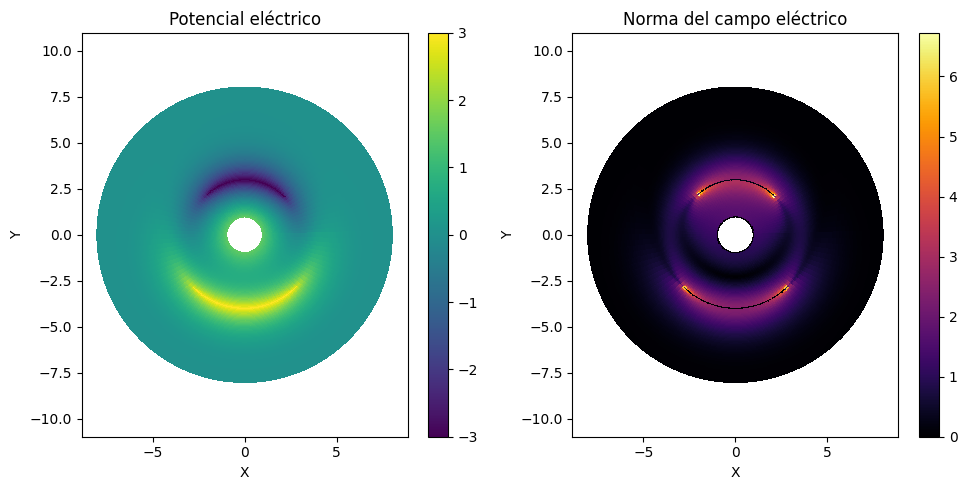

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def plot_electric_solution(V, E, r, theta):
    R, Theta = np.meshgrid(r, theta)
    X, Y = R * np.cos(Theta), R * np.sin(Theta)

    Er = E[:, 2].reshape((len(r), len(theta)))
    Etheta = E[:, 3].reshape((len(r), len(theta)))
    E_norm = np.sqrt(Er**2 + Etheta**2)

    # Graficar el potencial eléctrico
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.pcolor(X, Y, V.T, cmap='viridis', shading='auto')
    plt.colorbar()
    plt.title("Potencial eléctrico")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis('equal')

    # Graficar la norma del campo eléctrico
    plt.subplot(1, 2, 2)
    plt.pcolor(X, Y, E_norm.T, cmap='inferno', shading='auto')
    plt.colorbar()
    plt.title("Norma del campo eléctrico")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis('equal')

    plt.tight_layout()
    plt.show()

# Parámetros del problema
n_r = 112
n_theta = 112
v0 = 1.5    
vr1 = -3
vr2 = 3

# Solución del problema
V = electric_potential(n_r, n_theta, v0, vr1, vr2)

# Calcular el campo eléctrico
E = electric_field(n_r, n_theta, V)

# Discretización del dominio
r = np.linspace(1, 8, n_r)
theta = np.linspace(0, 2 * np.pi, n_theta)

# Graficar la solución eléctrica
plot_electric_solution(V, E, r, theta)


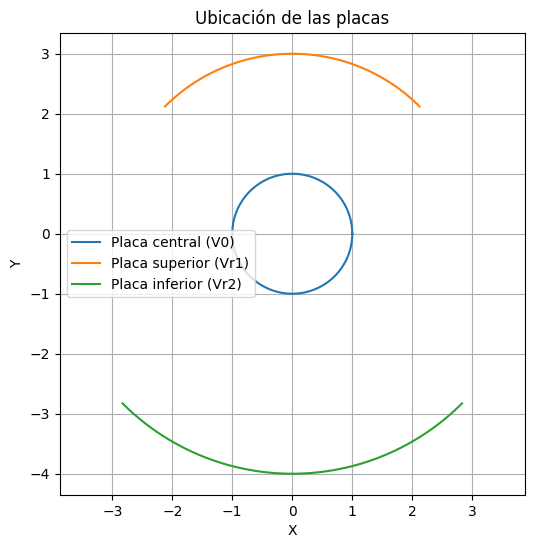

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def plot_plates(r1, r2, r3, theta1, theta2):
    theta = np.linspace(0, 2 * np.pi, 1000)
    x1, y1 = r1 * np.cos(theta), r1 * np.sin(theta)
    x2, y2 = r2 * np.cos(theta1), r2 * np.sin(theta1)
    x3, y3 = r3 * np.cos(theta2), r3 * np.sin(theta2)

    plt.figure(figsize=(6, 6))
    plt.plot(x1, y1, label='Placa central (V0)')
    plt.plot(x2, y2, label='Placa superior (Vr1)')
    plt.plot(x3, y3, label='Placa inferior (Vr2)')

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Ubicación de las placas")
    plt.legend()
    plt.axis('equal')
    plt.grid()
    plt.show()

r1 = 1
r2 = 3
r3 = 4
theta1 = np.linspace(np.pi / 4, 3 * np.pi / 4, 1000)
theta2 = np.linspace(5 * np.pi / 4, 7 * np.pi / 4, 1000)

plot_plates(r1, r2, r3, theta1, theta2)


